In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Disply all Columns
pd.options.display.max_columns=15

In [7]:
Box_officeANN = pd.read_csv('box_office_predictions.csv') 
Box_officeANN.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [8]:
Box_officeANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 562.6+ KB


In [9]:
Box_officeANN.describe(include=['object', 'bool', 'category'])

,country,director,genre,name,rating,star,studio
count,6000,6000,6000,6000,6000,6000,6000
unique,52,2549,17,6000,13,2317,1996
top,USA,Woody Allen,Comedy,Avatar (2009),R,Nicolas Cage,Universal Pictures
freq,4281,29,1818,1,3009,38,269


In [10]:
Box_office_v2ANN = Box_officeANN.copy()
Box_office_v2ANN.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


# Missing values

In [11]:
median_budget = Box_office_v2ANN.budget.median()
median_budget

11000000.0

In [12]:
Box_office_v2ANN['budget'] = Box_office_v2ANN['budget'].replace({0: 11000000})

In [13]:
Box_office_v2ANN['budget'].value_counts()

11000000.0    1966
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
16200000.0       1
17700000.0       1
21150000.0       1
25100000.0       1
20000.0          1
Name: budget, Length: 337, dtype: int64

# Adding TV

In [14]:
Profit = Box_office_v2ANN["gross"] - Box_office_v2ANN['budget']
Profit

0       523507625.0
1       458672302.0
2       502270625.0
3       403357910.0
4       349858444.0
           ...     
5995    -10998857.0
5996    -10999172.0
5997    -10999453.0
5998    -10999458.0
5999    -10999559.0
Length: 6000, dtype: float64

In [15]:
ROI = (Box_office_v2ANN['gross'] - Box_office_v2ANN['budget'])/Box_office_v2ANN['budget']*100
ROI

0       220.889293
1       229.336151
2       334.847083
3       183.344505
4       189.112672
           ...    
5995    -99.989609
5996    -99.992473
5997    -99.995027
5998    -99.995073
5999    -99.995991
Length: 6000, dtype: float64

In [16]:
Box_office_v2ANN['Profit'] = Profit
Box_office_v2ANN['ROI'] = ROI

In [17]:
Box_office_v2ANN['ROI'] = np.where(Box_office_v2ANN['ROI'] > 0.95, 1, 0)

In [18]:
Box_office_v2ANN

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,11000000.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,-10998857.0,0
5996,11000000.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,-10999172.0,0
5997,11000000.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,-10999453.0,0
5998,11000000.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,-10999458.0,0


In [19]:
Box_office_v2ANN['ROI'].value_counts()

0    3628
1    2372
Name: ROI, dtype: int64

In [20]:
Box_office_v2ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  Profit    6000 non-null   float64
 13  ROI       6000 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 632.9+ KB


In [21]:
Box_office_v2ANN['ROI'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: ROI, dtype: float64

In [22]:
to_delete = ['Profit']

In [23]:
Box_office_v2ANN = Box_office_v2ANN.drop(to_delete, axis = 1 )

In [24]:
Box_office_v2ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
 12  ROI       6000 non-null   int32  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 586.1+ KB


# One-Hot Encoding

In [25]:
Box_office_copyANN = Box_office_v2ANN.copy()
Box_office_copyANN

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,ROI
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,11000000.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,0
5996,11000000.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,0
5997,11000000.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,0
5998,11000000.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,0


In [26]:
data_column_category = Box_office_copyANN.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['country', 'director', 'genre', 'name', 'rating', 'star', 'studio'], dtype='object')

In [27]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(Box_office_copyANN[data_column_category])

In [28]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

,country_Argentina,country_Australia,country_Austria,country_Bahamas,country_Belgium,country_Brazil,country_Canada,...,studio_Zentropa Productions,studio_Zeta Entertainment,studio_Zucker Brothers Productions,studio_double A Films,studio_erbp,studio_i5 Films,studio_micro_scope
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
cols_types = Box_office_copyANN.dtypes != 'object'
inds = cols_types.index
numeric_cols = []
for i, col in enumerate(cols_types):
    if col:
        numeric_cols.append(inds[i])
numeric_cols

['budget', 'gross', 'runtime', 'score', 'votes', 'ROI']

In [30]:
numeric_cols =  Box_office_copyANN.loc[:, numeric_cols]

In [31]:
onehot_encoded_frame.columns

Index(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Bahamas', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_China', 'country_Colombia',
       ...
       'studio_Zenith Entertainment', 'studio_Zentropa Entertainments',
       'studio_Zentropa International Norway', 'studio_Zentropa Productions',
       'studio_Zeta Entertainment', 'studio_Zucker Brothers Productions',
       'studio_double A Films', 'studio_erbp', 'studio_i5 Films',
       'studio_micro_scope'],
      dtype='object', length=12944)

# Concatenate Cat & Transformed One-Hot encoded data

In [32]:
Box_office_copyANN= pd.concat([numeric_cols,onehot_encoded_frame], axis=1, sort= False)
Box_office_copyANN

,budget,gross,runtime,score,votes,ROI,country_Argentina,...,studio_Zentropa Productions,studio_Zeta Entertainment,studio_Zucker Brothers Productions,studio_double A Films,studio_erbp,studio_i5 Films,studio_micro_scope
0,237000000.0,760507625.0,162,7.8,958400,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200000000.0,658672302.0,194,7.8,865551,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150000000.0,652270625.0,124,7.0,470625,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,220000000.0,623357910.0,143,8.1,1069292,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,185000000.0,534858444.0,152,9.0,1845853,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,11000000.0,1143.0,103,6.5,4557,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,11000000.0,828.0,88,6.4,5540,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,11000000.0,547.0,104,7.2,16674,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,11000000.0,542.0,89,6.2,9055,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
Box_office_copyANN.shape

(6000, 12950)

# Saving ANNV1

In [34]:
 Box_office_copyANN.to_csv("Box_office_v3ANN.csv")

In [35]:
Box_office_v3ANN = pd.read_csv('Box_office_v3ANN.csv')
Box_office_v3ANN.head()

,Unnamed: 0,budget,gross,runtime,score,votes,ROI,...,studio_Zentropa Productions,studio_Zeta Entertainment,studio_Zucker Brothers Productions,studio_double A Films,studio_erbp,studio_i5 Films,studio_micro_scope
0,0,237000000.0,760507625.0,162,7.8,958400,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,200000000.0,658672302.0,194,7.8,865551,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,150000000.0,652270625.0,124,7.0,470625,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,220000000.0,623357910.0,143,8.1,1069292,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,185000000.0,534858444.0,152,9.0,1845853,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
Box_office_v3ANN =Box_office_v3ANN.drop('Unnamed: 0', axis = 1)

In [37]:
Box_office_v3ANN.head()

,budget,gross,runtime,score,votes,ROI,country_Argentina,...,studio_Zentropa Productions,studio_Zeta Entertainment,studio_Zucker Brothers Productions,studio_double A Films,studio_erbp,studio_i5 Films,studio_micro_scope
0,237000000.0,760507625.0,162,7.8,958400,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200000000.0,658672302.0,194,7.8,865551,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150000000.0,652270625.0,124,7.0,470625,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,220000000.0,623357910.0,143,8.1,1069292,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,185000000.0,534858444.0,152,9.0,1845853,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Identifying TV

In [38]:
 X = Box_office_v3ANN.drop('ROI', axis = 1)
 y = Box_office_v3ANN.ROI

In [39]:
X.shape

(6000, 12949)

In [40]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: ROI, Length: 6000, dtype: int64

# Data Split 

In [41]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)

In [42]:
training_features[:1]

,budget,gross,runtime,score,votes,country_Argentina,country_Australia,...,studio_Zentropa Productions,studio_Zeta Entertainment,studio_Zucker Brothers Productions,studio_double A Films,studio_erbp,studio_i5 Films,studio_micro_scope
2583,11000000.0,17382000.0,122,7.3,23152,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
test_features.shape

(1200, 12949)

In [44]:
training_features.shape

(4800, 12949)

# Baseline Model

In [45]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

DummyClassifier(strategy='most_frequent')

In [46]:
test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

[0 0 0 ... 0 0 0]


In [47]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.603


In [48]:
# This is the long way of computing the accuracy score
from sklearn.metrics import  confusion_matrix
dummy_baselineCM = confusion_matrix(test_target,test_target_pred)
dummy_baselineCM

array([[724,   0],
       [476,   0]], dtype=int64)

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
DecisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 45)

In [51]:
%%time
DecisionTreeModel.fit(training_features, training_target)

Wall time: 968 ms


DecisionTreeClassifier(criterion='entropy', random_state=45)

In [52]:
DT_Pred = DecisionTreeModel.predict(test_features)

In [53]:
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[713,  11],
       [  4, 472]], dtype=int64)

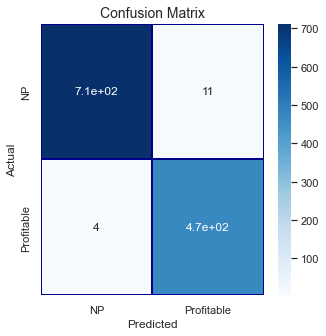

In [54]:
target = 'ROI'
CMTD = pd.crosstab(test_target,DT_Pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(CMTD, 
            xticklabels=['NP', 'Profitable'],
            yticklabels=['NP', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

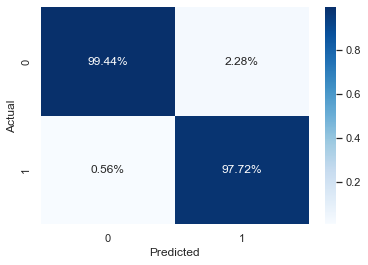

In [55]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [56]:
ADT= accuracy_score(test_target, DT_Pred)

print(" NB Prediction Accuracy : {:.2f}%".format(ADT * 100))

 NB Prediction Accuracy : 98.75%


# Naive Bayes

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_features = sc.fit_transform(training_features)
test_features = sc.transform(test_features)
training_features

array([[-0.48587775, -0.27740501,  0.8595875 , ..., -0.01443526,
        -0.01443526,  0.        ],
       [-0.62197112, -0.57508522, -1.31888135, ..., -0.01443526,
        -0.01443526,  0.        ],
       [-0.48587775, -0.36288327, -0.42515054, ..., -0.01443526,
        -0.01443526,  0.        ],
       ...,
       [-0.48587775, -0.55908414,  0.6361548 , ..., -0.01443526,
        -0.01443526,  0.        ],
       [-0.65599446, -0.47580324, -0.09000149, ..., -0.01443526,
        -0.01443526,  0.        ],
       [-0.48587775, -0.57661725, -0.42515054, ..., -0.01443526,
        -0.01443526,  0.        ]])

In [58]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Min-Max scaler (slightly different than StandardScaler!)
#from sklearn.preprocessing import MinMaxScaler


NBModel = GaussianNB()
NBModel.fit(training_features, training_target)

GaussianNB()

In [59]:
%%time

# Predicting the Test set results
NB_pred = NBModel.predict(test_features)

Wall time: 200 ms


In [60]:
# Making the Confusion Matrix
CMNB= confusion_matrix(test_target, NB_pred)
CMNB

array([[293, 431],
       [127, 349]], dtype=int64)

In [61]:
# Accuracy Score
ACNB= accuracy_score(test_target, NB_pred)

print(" NB Prediction Accuracy : {:.2f}%".format(ACNB * 100))
# print()

 NB Prediction Accuracy : 53.50%


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
LRModel = LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)

In [64]:
LRModel.fit(training_features, training_target)

LogisticRegression(max_iter=1000, random_state=45, solver='newton-cg')

In [65]:
%%time

# Predicting the Test set results

LR_pred =LRModel.predict(test_features)

Wall time: 23.6 ms


In [66]:
# Making the Confusion Matrix
CMLR= confusion_matrix(test_target, LR_pred)
CMLR

array([[563, 161],
       [223, 253]], dtype=int64)

In [67]:
# Accuracy Score
ACLR= accuracy_score(test_target, LR_pred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))

 LGR Prediction Accuracy : 68.00%


# SVM

In [68]:
from sklearn.svm import SVC 

In [69]:
SVMModel = SVC(kernel = 'linear', random_state = 45)

In [70]:
SVMModel.fit(training_features, training_target)

SVC(kernel='linear', random_state=45)

In [71]:
%%time

# Predicting the Test set results
SVM_pred = SVMModel.predict(test_features)

Wall time: 26.1 s


In [72]:
# Making the Confusion Matrix
CMSVM= confusion_matrix(test_target, SVM_pred)
CMSVM

array([[559, 165],
       [212, 264]], dtype=int64)

In [73]:
# Accuracy Score
ACSVM= accuracy_score(test_target, SVM_pred )

print(" SVM Prediction Accuracy : {:.2f}%".format(ACSVM * 100))

 SVM Prediction Accuracy : 68.58%


# KSVM

In [74]:
from sklearn.svm import SVC
KSVMModel = SVC(kernel = 'rbf', random_state = 45)
KSVMModel.fit(training_features, training_target)

SVC(random_state=45)

In [75]:
%%time

# Predicting the Test set results
KSVM_pred = KSVMModel.predict(test_features)

Wall time: 1min 19s


In [76]:
# Making the Confusion Matrix
CMKSVM = confusion_matrix(test_target, KSVM_pred)
CMKSVM

array([[104, 620],
       [ 35, 441]], dtype=int64)

In [77]:
# Accuracy Score
ACKSVM= accuracy_score(test_target, KSVM_pred)
print(ACKSVM)

0.45416666666666666


# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
KNNModel = KNeighborsClassifier(n_neighbors = 21)

In [80]:
KNNModel.fit(training_features, training_target)

KNeighborsClassifier(n_neighbors=21)

In [81]:
%%time

# Predicting the Test set results

KNN_pred = KNNModel.predict(test_features)

Wall time: 927 ms


In [82]:
# Confusion Matrix
CMKNN = confusion_matrix(test_target,KNN_pred)
CMKNN

array([[  2, 722],
       [  1, 475]], dtype=int64)

In [83]:
# Accuracy Score
ACKNN= accuracy_score(test_target, KNN_pred )
print(ACKNN)

0.3975


# Deep learning ANN

In [84]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.10.0


In [85]:
classifier = tf.keras.Sequential()

In [86]:
# Adding the input layer and the first hidden layer
classifier.add(tf.keras.layers.Dense(6, activation='relu', kernel_initializer='uniform',input_dim=12949))

In [87]:
classifier.add(tf.keras.layers.Dense(4, activation='relu', kernel_initializer='uniform'))

In [88]:
classifier.add(tf.keras.layers.Dense(3, activation='relu', kernel_initializer='uniform'))

In [89]:
classifier.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer='uniform'))

In [90]:
classifier.add(tf.keras.layers.Dense(1, activation='relu', kernel_initializer='uniform'))

In [91]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# ANN Prediction

In [92]:
training_target.shape

(4800,)

In [93]:
training_features.shape

(4800, 12949)

In [95]:

classifier.fit(training_features, training_target, batch_size = 10, epochs=30)
# evaluate the model
scores = classifier.evaluate(training_features, training_target)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Epoch 1/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 2/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 3/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 4/30
480/480 [==============================] - 1s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 5/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 6/30
480/480 [==============================] - 1s 1ms/step - loss: 6.0928 - accuracy: 0.6050
Epoch 7/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 8/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 9/30
480/480 [==============================] - 0s 1ms/step - loss: 6.0929 - accuracy: 0.6050
Epoch 10/30
480/480 [==============================] - 1s 1ms/step - loss: 6.0929 - accuracy: 0.6050

In [96]:
%%time

# Predicting the Test set results
ANN_pred = classifier.predict(test_features)
ANN_pred = (ANN_pred > 0.5)

38/38 [==============================] - 0s 1ms/step
Wall time: 247 ms


In [97]:
# Confusion Matrix
CMANN = confusion_matrix(test_target,ANN_pred)
CMANN

array([[724,   0],
       [476,   0]], dtype=int64)

In [98]:
# Accuracy Score
ACANN= accuracy_score(test_target, ANN_pred )
print(ACANN)

0.6033333333333334


In [99]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 77700     
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 77,754
Trainable params: 77,754
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
!pip install keras

In [101]:
from tensorflow import keras
import keras;

In [102]:
# import keras;
# from keras.models import Sequential;
# from keras.layers import Dense;

network = tf.keras.Sequential();
        #Hidden Layer#1
network.add(tf.keras.layers.Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform',
                  input_dim=11));

        #Hidden Layer#2
network.add(tf.keras.layers.Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform'));

        #Exit Layer
# network.add(Dense(units=1,
network.add(tf.keras.layers.Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform'));



In [103]:
! pip install ann_visualizer
! pip install graphviz

In [104]:
# graphViz package installed and path added to the PATH environment variable
from ann_visualizer.visualize import ann_viz;

ann_viz(network, title="");

# Models Compared

In [105]:
# Accuracy Score
print(' Baseline on frequency                         : {:5.3f}'.format(score* 100))
print(" Decision Tree Prediction Accuracy                      : {:.2f}%".format(ADT * 100))
print(" Naive Byes Prediction Accuracy                         : {:.2f}%".format(ACNB * 100))
print(" Logistic Regression Prediction Accuracy                : {:.2f}%".format(ACLR * 100))
print(" Support Vector Machine Prediction Accuracy             : {:.2f}%".format(ACSVM * 100))
print(" K-Support Vector Machine Prediction Accuracy           : {:.2f}%".format(ACKSVM * 100))
print(" K-Nearest Neighbor Prediction Accuracy                 : {:.2f}%".format(ACKNN * 100))
print(" ANN Prediction Accuracy                                : {:.2f}%".format(ACANN * 100))

 Baseline on frequency                         : 60.333
 Decision Tree Prediction Accuracy                      : 98.75%
 Naive Byes Prediction Accuracy                         : 53.50%
 Logistic Regression Prediction Accuracy                : 68.00%
 Support Vector Machine Prediction Accuracy             : 68.58%
 K-Support Vector Machine Prediction Accuracy           : 45.42%
 K-Nearest Neighbor Prediction Accuracy                 : 39.75%
 ANN Prediction Accuracy                                : 60.33%
